In [ ]:
#Creates a time series forecasting using ML

In [12]:
import pandas as pd
from prophet import Prophet
import numpy as np

In [82]:
df = pd.read_csv('forecasting.csv')

In [84]:
#takes a look of our dataset
df.head()


,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [86]:
#Summary statistics of our dataset
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [88]:
#Check how many unique values we have within the dataset
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [90]:
#Display datatypes
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [92]:
#converts the 'Time Data" into a date time format - Applying structuring using lambda
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x) [: -6])
df['da'] = pd.DatetimeIndex(df['Year'] + '-' +df['Month'] + '-' +df['Day'])

In [94]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,da
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [ ]:
#Drop the unnecessary columns #axis -1 refers to dropping columns rather than rows. 
#inplace refers to changing the already existing dataset rather than creating a new one


df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [ ]:
#Filter through cells
#df[df['Product'] = axjlfs

In [107]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [111]:
#Building our model - Created a new model using our Prophet class. Our 2 Parameters our
# Interval_width looks at our confidence interval - Daily sensoriality = True(because we have dates)
#Trained our model using variable "m" - fit method, fits our dataframe 
m = Prophet(interval_width=0.95, daily_seasonality = True)
model = m.fit(df)

00:39:23 - cmdstanpy - INFO - Chain [1] start processing
00:39:23 - cmdstanpy - INFO - Chain [1] done processing


In [117]:
#Create predictions
#Used the method to encapsulate our caculations using "Make future dataframes passing parameters)
#periods represents how far in the future we would like to go 
#D represents how often = Day
#Use Prophet 'Predict' method to predict future calculations.
#Lastly, present our predictions
future = m.make_future_dataframe(periods=100, freq ='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.689704,780.307418,3927.368108,3041.689704,3041.689704,-642.043293,-642.043293,-642.043293,468.569986,...,16.627334,16.627334,16.627334,-1127.240613,-1127.240613,-1127.240613,0.0,0.0,0.0,2399.646411
1,2018-01-02,3042.449564,784.257721,4025.319098,3042.449564,3042.449564,-652.191387,-652.191387,-652.191387,468.569986,...,-11.269989,-11.269989,-11.269989,-1109.491384,-1109.491384,-1109.491384,0.0,0.0,0.0,2390.258177
2,2018-01-03,3043.209424,729.103572,4049.625315,3043.209424,3043.209424,-626.373366,-626.373366,-626.373366,468.569986,...,-4.392342,-4.392342,-4.392342,-1090.551010,-1090.551010,-1090.551010,0.0,0.0,0.0,2416.836058
3,2018-01-04,3043.969283,794.311817,4047.429670,3043.969283,3043.969283,-579.460690,-579.460690,-579.460690,468.569986,...,22.465599,22.465599,22.465599,-1070.496276,-1070.496276,-1070.496276,0.0,0.0,0.0,2464.508593
4,2018-01-05,3044.729143,876.226826,4033.816067,3044.729143,3044.729143,-615.474741,-615.474741,-615.474741,468.569986,...,-34.587957,-34.587957,-34.587957,-1049.456770,-1049.456770,-1049.456770,0.0,0.0,0.0,2429.254402


In [119]:
#display deeper future forecast periods
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4235.667647,2111.855626,5342.609625,4232.355246,4238.482414,-514.572606,-514.572606,-514.572606,468.569986,...,16.627334,16.627334,16.627334,-999.769926,-999.769926,-999.769926,0.0,0.0,0.0,3721.095041
1176,2021-03-23,4236.736783,2154.199370,5307.099746,4233.368302,4239.595374,-532.014616,-532.014616,-532.014616,468.569986,...,-11.269989,-11.269989,-11.269989,-989.314613,-989.314613,-989.314613,0.0,0.0,0.0,3704.722168
1177,2021-03-24,4237.805919,2037.731909,5258.040332,4234.341045,4240.715146,-517.459770,-517.459770,-517.459770,468.569986,...,-4.392342,-4.392342,-4.392342,-981.637414,-981.637414,-981.637414,0.0,0.0,0.0,3720.346149
1178,2021-03-25,4238.875055,2072.269845,5330.869746,4235.357039,4241.834406,-486.286042,-486.286042,-486.286042,468.569986,...,22.465599,22.465599,22.465599,-977.321628,-977.321628,-977.321628,0.0,0.0,0.0,3752.589013
1179,2021-03-26,4239.944191,2008.538333,5329.102804,4236.409881,4242.953665,-542.883552,-542.883552,-542.883552,468.569986,...,-34.587957,-34.587957,-34.587957,-976.865581,-976.865581,-976.865581,0.0,0.0,0.0,3697.060639


In [121]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2399.646411
1,2018-01-02,2390.258177
2,2018-01-03,2416.836058
3,2018-01-04,2464.508593
4,2018-01-05,2429.254402
...,...,...
1175,2021-03-22,3721.095041
1176,2021-03-23,3704.722168
1177,2021-03-24,3720.346149
1178,2021-03-25,3752.589013


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


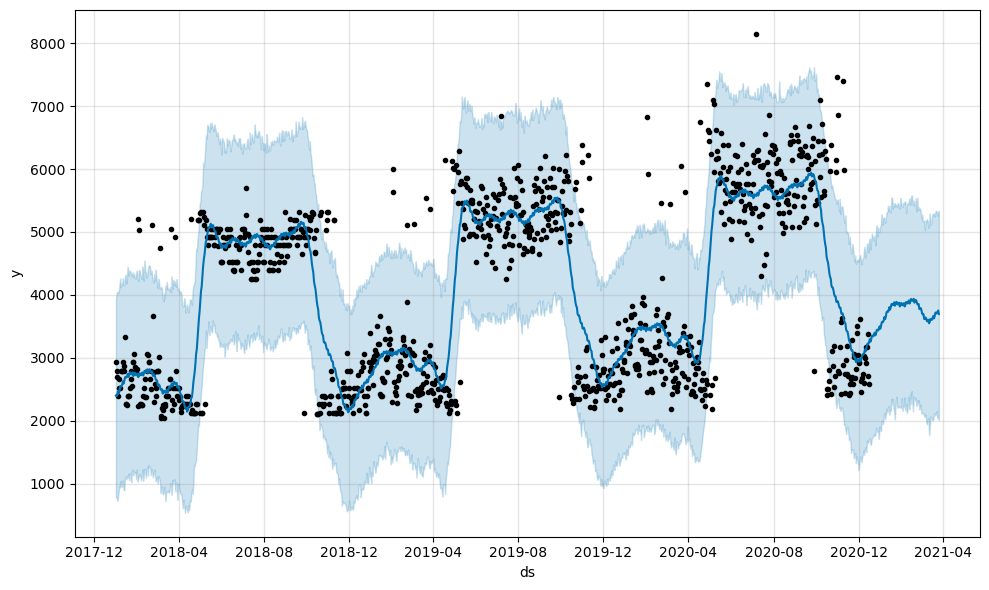

In [123]:
#plot our data set and visualizes it
#Blue regions represnts yhat upper & Lower while blue line represents yhat
plot1 = m.plot(forecast)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

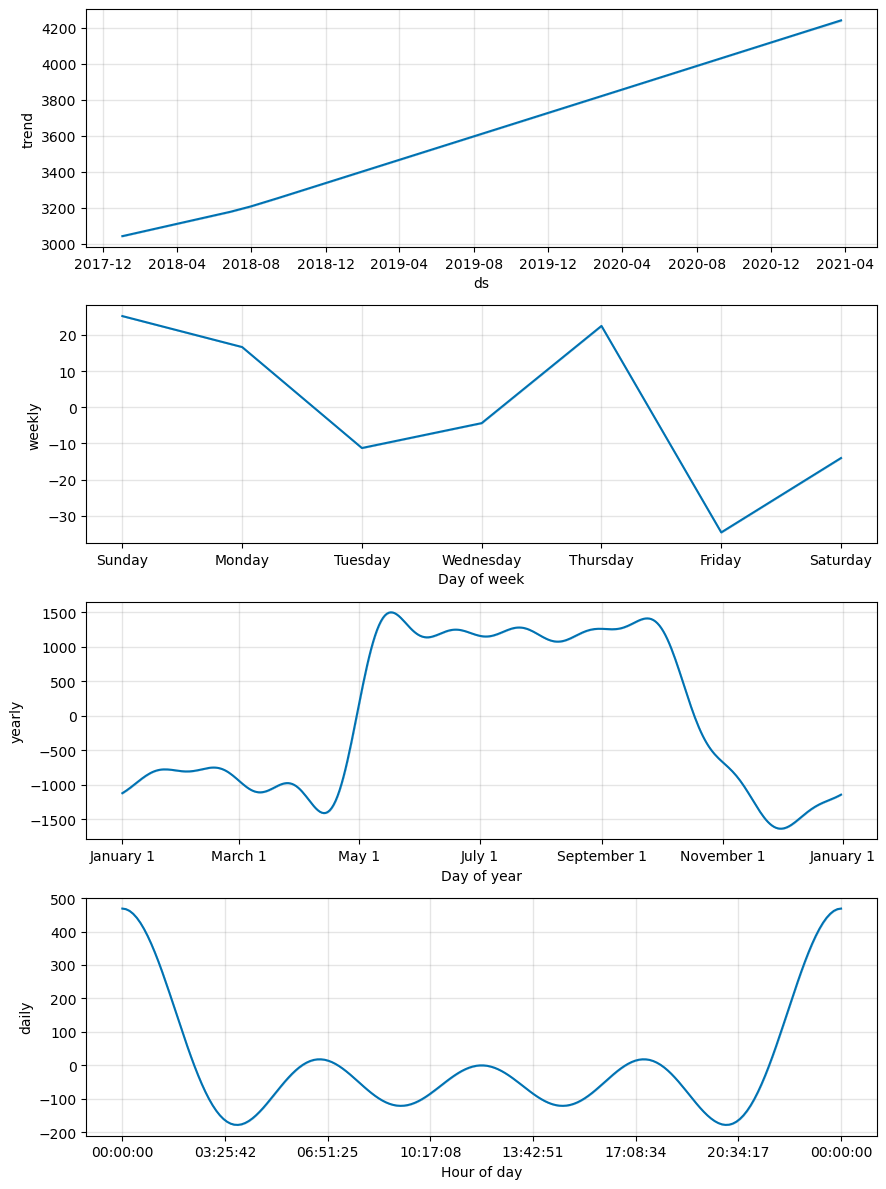

In [125]:
#Decomposs your trend
plot2 = m.plot_components(forecast)